# Importando librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Carga de los datos

In [18]:
#nacional
na_accesos_cada_100_hogares_fijo= pd.read_csv('./csv_corregidos/na_accesos_cada_100_hogares_fijo.csv')
na_accesos_b_ancha_angosta_fijo= pd.read_csv('./csv_corregidos/na_accesos_b_ancha_angosta_fijo.csv')
na_accesos_tipo_tecnologia_fijo= pd.read_csv('./csv_corregidos/na_accesos_tipo_tecnologia_fijo.csv')
na_velocidad_media_bajada= pd.read_csv('./csv_corregidos/na_velocidad_media_bajada.csv')
na_dis_accesos_rango_vel_bajada= pd.read_csv('./csv_corregidos/na_dis_accesos_rango_vel_bajada.csv')
na_ingresos_operadores_fijo= pd.read_csv('./csv_corregidos/na_ingresos_operadores_fijo.csv')
#provincial
prov_accesos_cada_100_hogares_fijo=pd.read_csv('./csv_corregidos/prov_accesos_cada_100_hogares_fijo.csv')
prov_velocidad_media_bajada = pd.read_csv('./csv_corregidos/prov_velocidad_media_bajada.csv')
prov_accesos_tipo_tecnologia_fijo = pd.read_csv('./csv_corregidos/prov_accesos_tipo_tecnologia_fijo.csv')
prov_accesos_b_ancha_angosta_fijo = pd.read_csv('./csv_corregidos/prov_accesos_b_ancha_angosta_fijo.csv')
prov_dis_accesos_rango_vel_bajada = pd.read_csv('./csv_corregidos/prov_dis_accesos_rango_vel_bajada.csv')
prov_dis_accesos_todo_vel_bajada = pd.read_csv('./csv_corregidos/prov_dis_accesos_todo_vel_bajada.csv')


# De lo visto en el ETL:

#### Nacional
-_Los df a nivel nacional cuentan de 36 observaciones. Sin valores faltantes observables._

-_Se puede ver que los datos estan agrupados por en 4 trimestres por año y van desde el 2014 al 2018._

#### Provincial
-_Los df a nivel provincial cuentan de 864 observaciones. exceptuando 'prov_dis_accesos_todo_vel_bajada' que cuenta con 504 observaciones_


-_Se puede ver que los datos estan agrupados por en 4 trimestres por año y van desde el 2014 al 2018._

#### Localidad
-_No se van a usar los df que contienen localidades ya que no tienen fechas, horas o trimestres de los que se pueda guiar_

-_Vemos que todas las tablas tienen diferencias en la cantidad de datos, por lo que habria discrepancia en las tablas de localidades vistas_

# Comenzando el análisis

In [12]:
# Calcular estadísticas descriptivas
prov_accesos_cada_100_hogares_fijo.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620301
std,2.583484,1.118682,23.319150
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,124.060000


Promedio de Penetración:
El promedio de accesos a Internet fijo por cada 100 hogares en las provincias es de aproximadamente 49.62. Esto indica que, en promedio, alrededor del 49.62% de los hogares en las provincias tienen acceso a Internet fijo.

Variabilidad en la Penetración:
La penetración de Internet fijo por provincia muestra una amplia variabilidad en Argentina. Esto significa que algunas provincias tienen una mayor adopción de Internet fijo, con valores que superan el promedio nacional, mientras que otras provincias tienen una penetración más baja.

Rango de Valores Extremos:
Va desde un mínimo del 9.35 hasta un máximo de 124.06, ilustrando la diversidad de situaciones en todo el país. Estos valores extremos indican áreas con alta demanda de acceso a Internet y áreas que podrían requerir una mayor inversión en infraestructura.

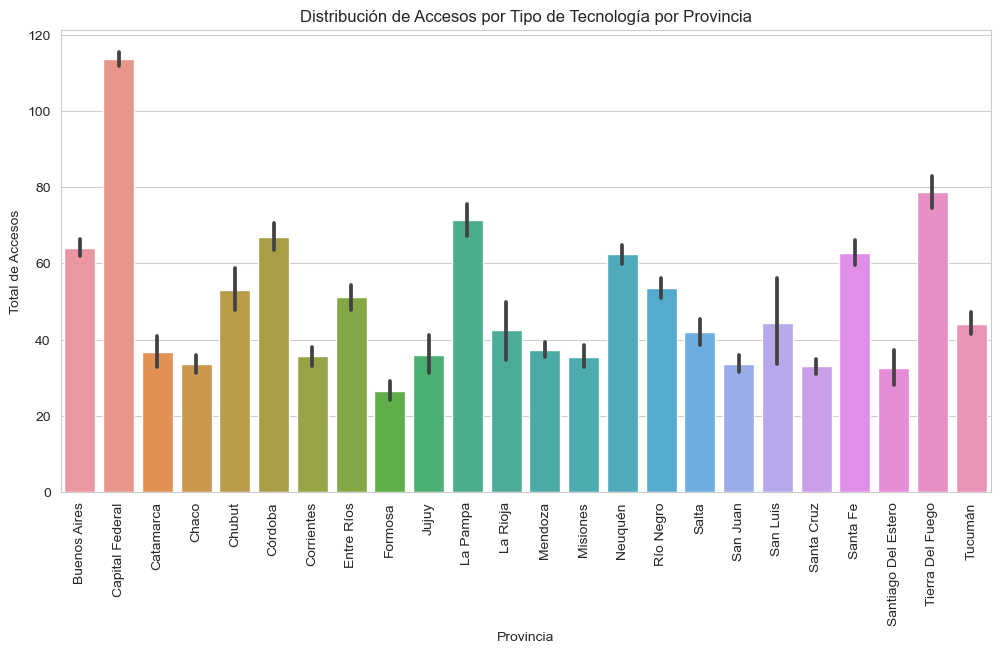

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prov_accesos_cada_100_hogares_fijo, x='Provincia', y='Accesos por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Total de Accesos')
plt.title('Distribución de Accesos por Tipo de Tecnología por Provincia')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

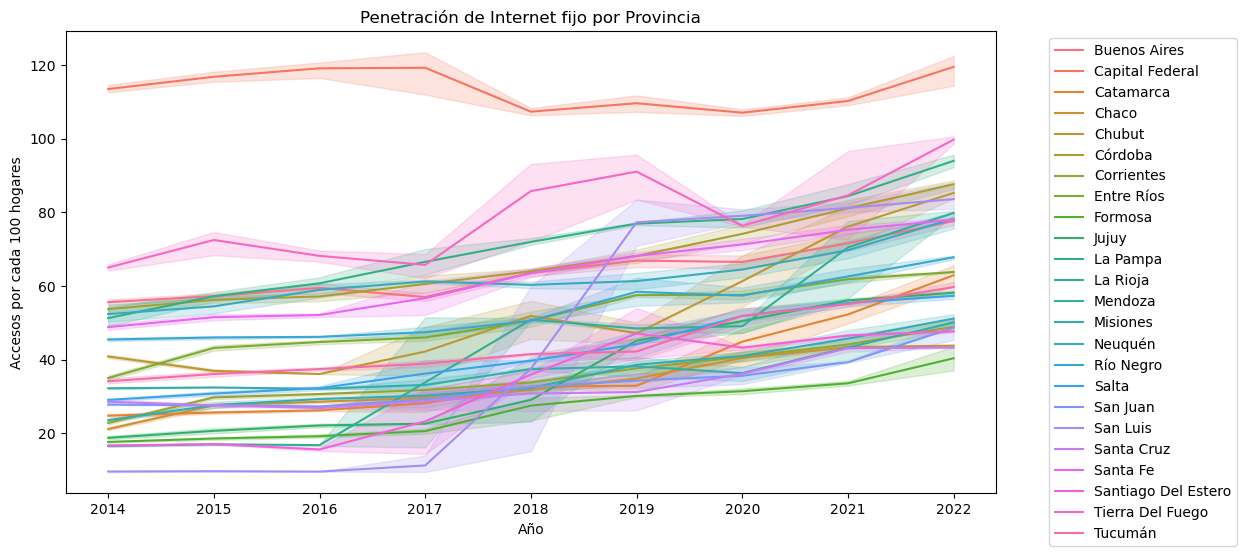

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=prov_accesos_cada_100_hogares_fijo, x='Año', y='Accesos por cada 100 hogares', hue='Provincia')
plt.title('Penetración de Internet fijo por Provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En general, la mayoría de las provincias muestran un crecimiento lento y constante en el acceso a Internet durante el período estudiado. No obstante, dos regiones destacan por sus particularidades.

En primer lugar, Capital Federal se destaca como una de las provincias con un acceso constante y sostenido a Internet fijo, manteniéndose por encima del promedio nacional en la mayoría de los trimestres. Aunque su tasa de crecimiento es más moderada en comparación con otras provincias, su nivel de acceso es relativamente alto y estable.

En segundo lugar, la provincia de San Luis experimentó un aumento significativo en el acceso a Internet entre los años 2017 y 2019, fechas en las que Capital Federal experimento una ligera bajada, marcando un período de crecimiento más acelerado en comparación con otras regiones. Esta variación podría estar relacionada con desarrollos específicos en infraestructura tecnológica o políticas de acceso a Internet en la provincia.

In [42]:
prov_velocidad_media_bajada.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,15.375182
std,2.583484,1.118682,18.320956
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.316775
50%,2018.000000,2.500000,7.416094
75%,2020.000000,3.250000,19.709719
max,2022.000000,4.000000,182.860000


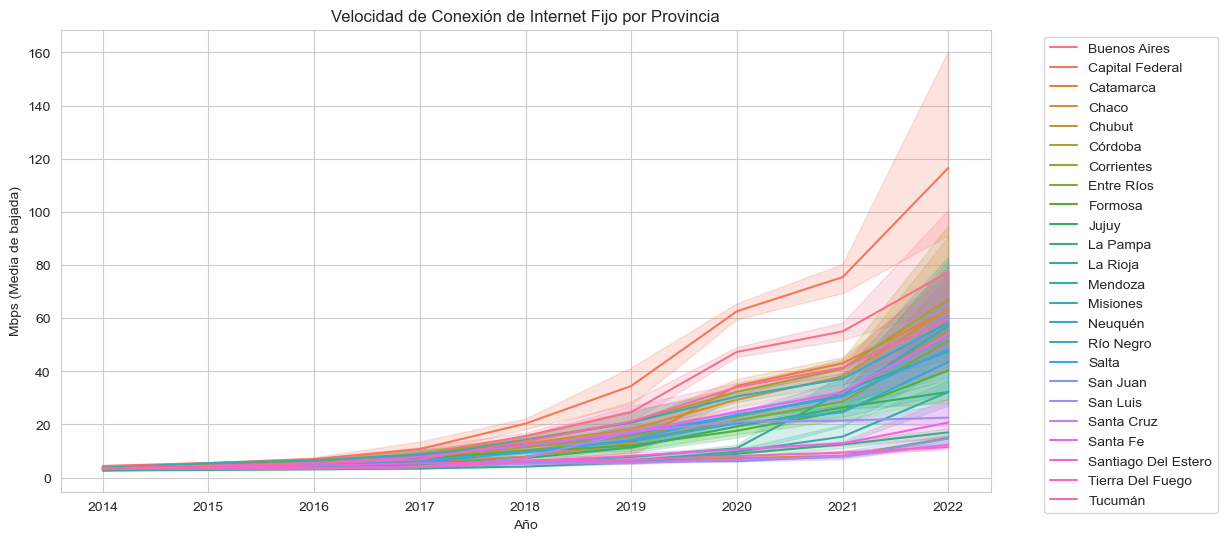

In [14]:
#gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=prov_velocidad_media_bajada, x='Año', y='Mbps (Media de bajada)', hue='Provincia')

plt.title('Velocidad de Conexión de Internet Fijo por Provincia')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Velocidad de Conexión por Provincia: 
Los datos muestran que la velocidad de conexión de Internet fijo varía significativamente entre las provincias. En general, hasta el año 2016, las diferencias no eran tan marcadas, pero a partir de 2017, se observa un aumento en la disparidad, con Capital Federal destacándose con una velocidad de conexión promedio de más de 110 Mbps en 2022, mientras que otras provincias no superan los 80 Mbps en promedio.

Tendencia Temporal:
 Se observa una tendencia creciente en la velocidad de conexión en la mayoría de las provincias a lo largo de los años, especialmente a partir de 2017. Esta tendencia podría reflejar el avance tecnológico y la expansión de redes de banda ancha en el país.

In [43]:
prov_accesos_tipo_tecnologia_fijo.describe()

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,8.640000e+02,8.640000e+02,8.640000e+02,864.000000,864.000000,8.640000e+02
mean,2018.000000,1.255457e+05,1.739913e+05,3.262331e+04,10720.798611,6228.967593,3.491101e+05
std,2.583484,2.520514e+05,4.276313e+05,1.325430e+05,18723.092796,10740.931282,7.494854e+05
min,2014.000000,6.120000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2016.000000,2.232025e+04,8.912500e+03,2.052500e+02,261.000000,313.000000,5.232900e+04
50%,2018.000000,4.816100e+04,3.498400e+04,1.233000e+03,4377.000000,1862.500000,1.045965e+05
75%,2020.000000,1.025470e+05,7.168325e+04,1.564250e+04,12673.750000,7128.000000,1.801745e+05
max,2022.000000,1.586343e+06,2.767247e+06,1.499149e+06,129910.000000,73415.000000,4.794665e+06


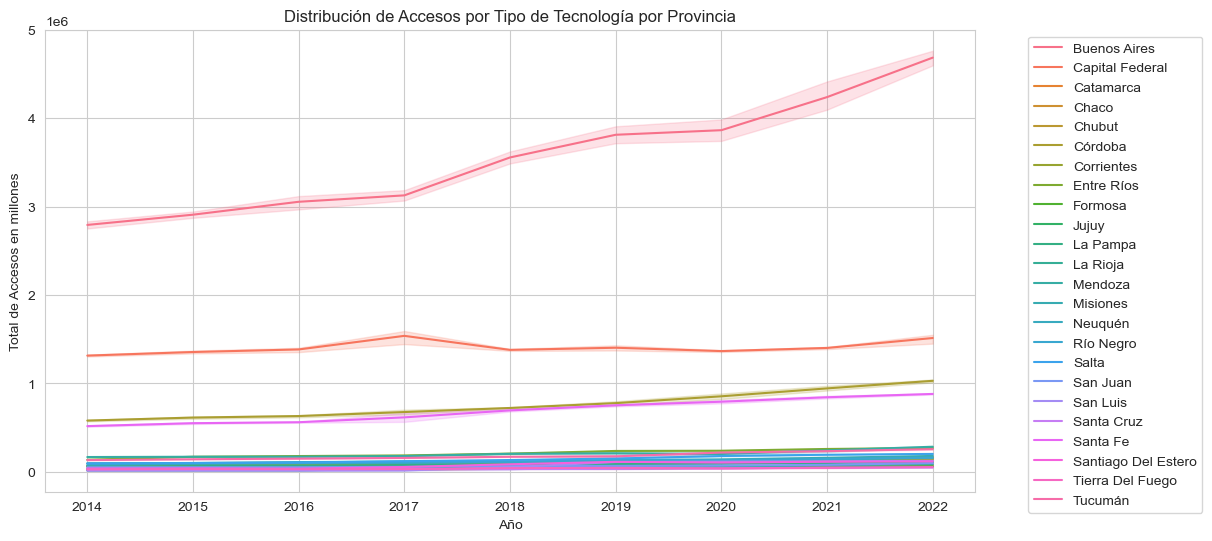

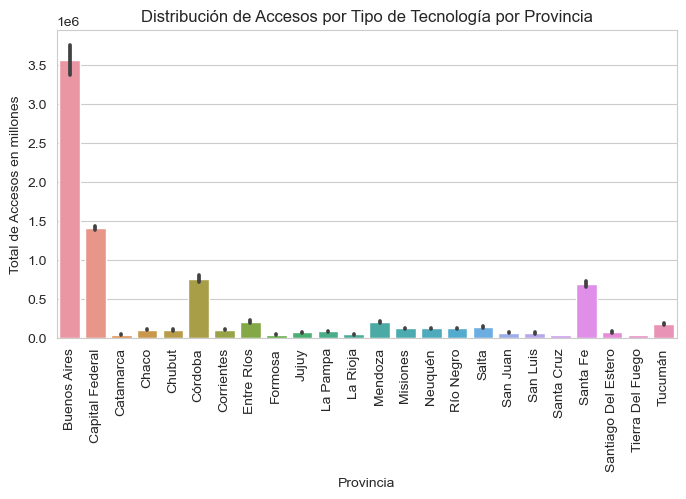

In [55]:
#gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=prov_accesos_tipo_tecnologia_fijo, x='Año', y='Total', hue='Provincia')

plt.title('Distribución de Accesos por Tipo de Tecnología por Provincia')
plt.xlabel('Año')
plt.ylabel('Total de Accesos en millones')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#grafico de barras
plt.figure(figsize=(8,4))
sns.barplot(data=prov_accesos_tipo_tecnologia_fijo, x='Provincia', y='Total')
plt.xlabel('Provincia')
plt.ylabel('Total de Accesos en millones')
plt.title('Distribución de Accesos por Tipo de Tecnología por Provincia')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

plt.show()


Es evidente que la provincia de Buenos Aires lidera en términos de total de accesos y también muestra un crecimiento significativo a lo largo de los años, llegando a casi 5 millones en 2022. Capital Federal, aunque es la siguiente en la lista, está por debajo de Buenos Aires en cuanto al número total de accesos y no llega al millón y medio.

También es notable que, aparte de Buenos Aires, Capital Federal, Córdoba y Santa Fe, el crecimiento en otras provincias es mucho más bajo. Estas observaciones destacan la disparidad en la distribución de accesos y el crecimiento en diferentes regiones del país, lo que puede ser de interés para futuros análisis y toma de decisiones en el sector de telecomunicaciones.

In [57]:
prov_accesos_b_ancha_angosta_fijo.head(2)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926


In [58]:
prov_accesos_b_ancha_angosta_fijo.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,8.640000e+02,862.000000,8.640000e+02
mean,2018.000000,2.500000,3.481485e+05,963.879350,3.491101e+05
std,2.583484,1.118682,7.476219e+05,2397.370177,7.494854e+05
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04
25%,2016.000000,1.750000,5.221525e+04,9.000000,5.232900e+04
50%,2018.000000,2.500000,1.044120e+05,148.000000,1.045965e+05
75%,2020.000000,3.250000,1.791568e+05,619.000000,1.801745e+05
max,2022.000000,4.000000,4.788466e+06,15229.000000,4.794665e+06


La media de Banda ancha fija es aproximadamente 348148 accesos. Esto indica que, en promedio, alrededor de 348148 accesos de banda ancha fija se registran en las provincias.

La media de Dial up es aproximadamente 963,88 accesos. La adopción de Dial-Up es considerablemente menor en comparación con la banda ancha fija.

 La desviación estándar de Banda ancha fija es alta, lo que sugiere que hay una variabilidad significativa en la penetración de la banda ancha fija en las provincias.

Los valores mínimos y máximos para Banda ancha fija muestran la diversidad de situaciones en todo el conjunto de datos. El valor mínimo es de alrededor de 12,193, mientras que el máximo es de aproximadamente 4,788,466.

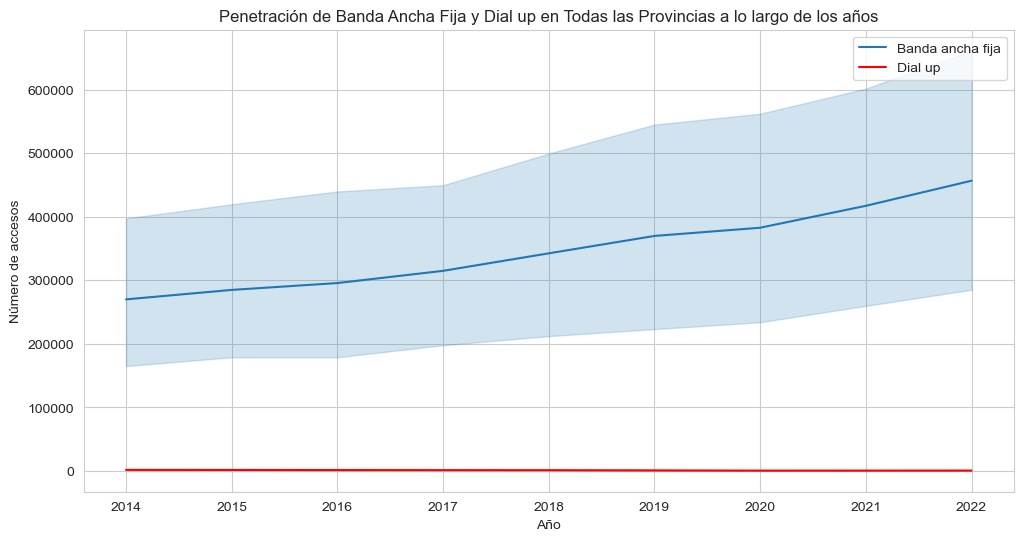

In [75]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=prov_accesos_b_ancha_angosta_fijo, x='Año', y='Banda ancha fija', label='Banda ancha fija')
sns.lineplot(data=prov_accesos_b_ancha_angosta_fijo, x='Año', y='Dial up', label='Dial up', color='red')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.title('Penetración de Banda Ancha Fija y Dial up en Todas las Provincias a lo largo de los años')
plt.legend()
plt.show()

vemos que dial up tiene muy poco uso y que no tiene un crecimiento visible a lo largo del timepo, a diferencia de Banda Ancha Fija que denota crecimiento visible y continuado a lo largo de los años

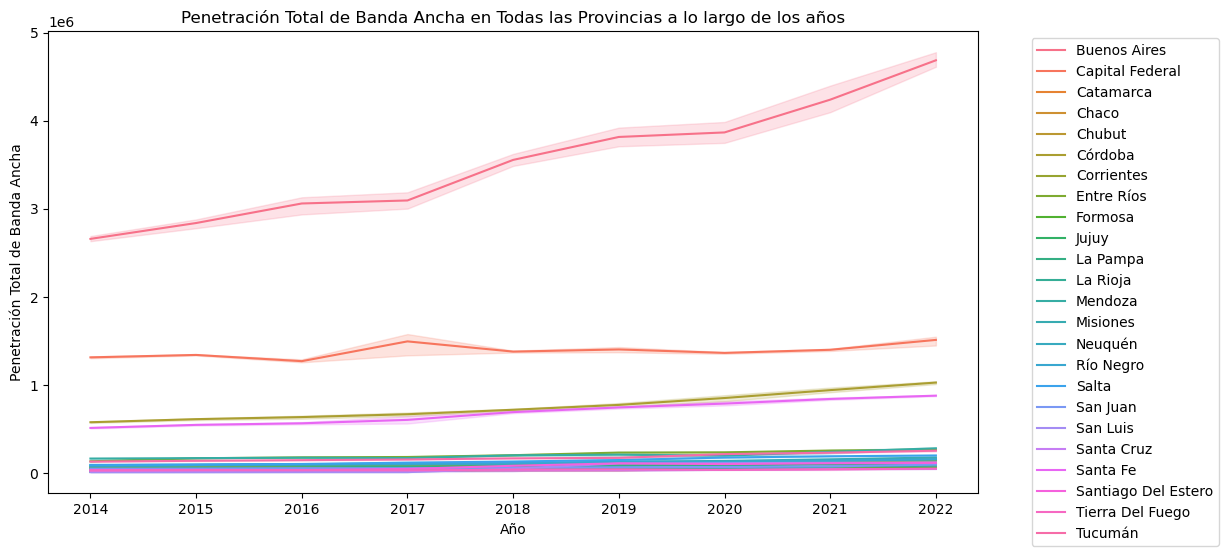

In [15]:
#gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=prov_dis_accesos_rango_vel_bajada, x='Año', y='Total', hue='Provincia')

plt.title('Penetración Total de Banda Ancha en Todas las Provincias a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Penetración Total de Banda Ancha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

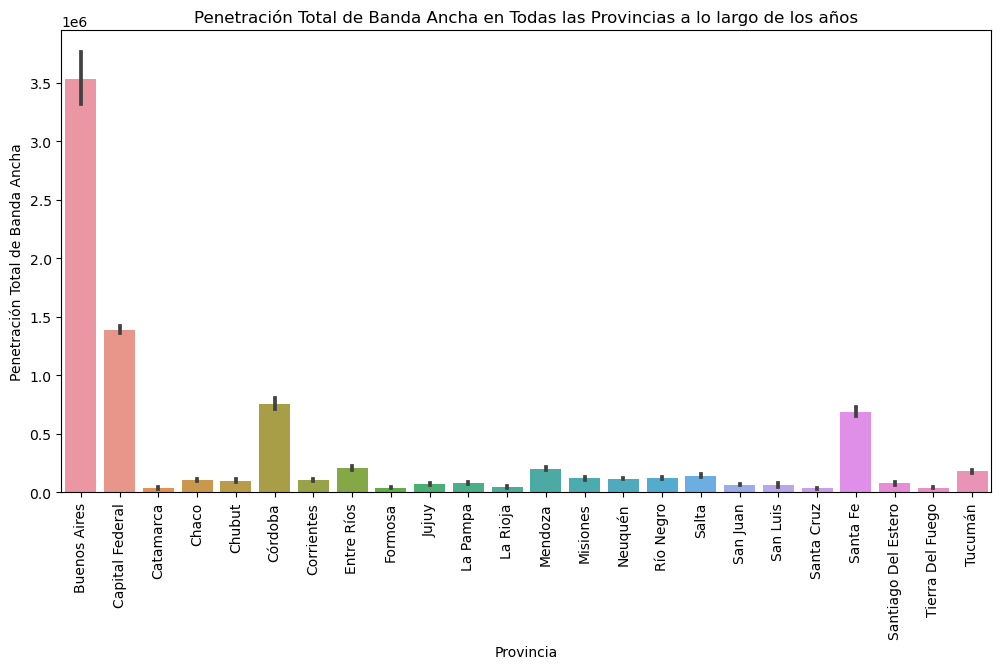

In [17]:
# Crear el gráfico de barras para la penetración total de banda ancha en todas las provincias a lo largo de los años
plt.figure(figsize=(12, 6))
sns.barplot(data=prov_dis_accesos_rango_vel_bajada, x='Provincia', y='Total')

plt.xlabel('Provincia')
plt.ylabel('Penetración Total de Banda Ancha')
plt.title('Penetración Total de Banda Ancha en Todas las Provincias a lo largo de los años')
plt.xticks(rotation=90)
# plt.legend(title='Provincia')
plt.show()


este grafico se comporta de la misma manera que 'prov_accesos_tipo_tecnologia_fijo'en totales

Aparte de Buenos Aires, Capital Federal, Córdoba y Santa Fe, el crecimiento en otras provincias es mucho más bajo.

In [4]:
prov_dis_accesos_rango_vel_bajada.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,858.00000,8.640000e+02
mean,2018.000000,2.500000,2065.484954,9960.253472,1.480209e+05,37641.817130,38114.030093,20793.402778,8.555756e+04,5289.20979,3.474059e+05
std,2.583484,1.118682,13459.419708,21992.818620,3.438435e+05,65383.130836,93024.185664,73859.534388,3.635417e+05,13011.53175,7.450600e+05
min,2014.000000,1.000000,6.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.00000,1.240600e+04
25%,2016.000000,1.750000,39.000000,312.000000,2.744150e+04,2929.000000,1579.750000,25.750000,8.000000e+00,0.00000,5.274050e+04
50%,2018.000000,2.500000,109.000000,2536.000000,4.783750e+04,11247.000000,9067.000000,1146.000000,1.019000e+03,0.00000,1.052355e+05
75%,2020.000000,3.250000,541.250000,8056.250000,8.639200e+04,38753.250000,26408.000000,9567.500000,2.247475e+04,5146.00000,1.791482e+05
max,2022.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.00000,4.794665e+06


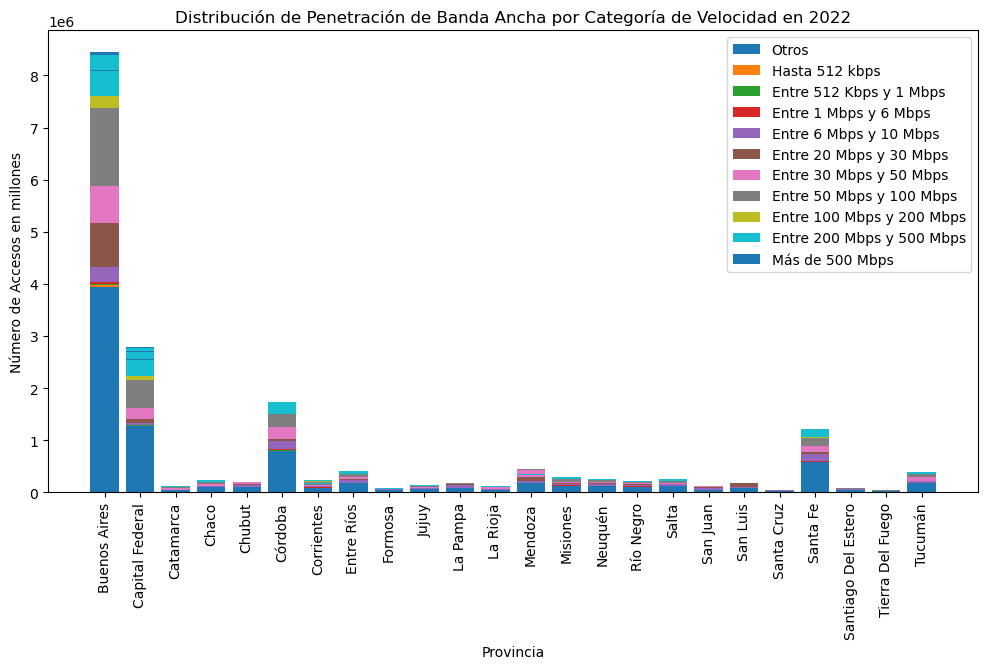

In [32]:
# Filtrar el DataFrame para un año específico (por ejemplo, 2022)
año_elegido = 2022
data_año_elegido = prov_dis_accesos_todo_vel_bajada[prov_dis_accesos_todo_vel_bajada['Año'] == año_elegido]

# Definir las categorías de velocidad
categorias = ['Otros', "Hasta 512 kbps",
    "Entre 512 Kbps y 1 Mbps",
    "Entre 1 Mbps y 6 Mbps",
    "Entre 6 Mbps y 10 Mbps",
    "Entre 20 Mbps y 30 Mbps",
    "Entre 30 Mbps y 50 Mbps",
    "Entre 50 Mbps y 100 Mbps",
    "Entre 100 Mbps y 200 Mbps",
    "Entre 200 Mbps y 500 Mbps",
    "Más de 500 Mbps"]

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 6))
bottom = None
for categoria in categorias:
    plt.bar(data_año_elegido['Provincia'], data_año_elegido[categoria], label=categoria, bottom=bottom)
    if bottom is None:
        bottom = data_año_elegido[categoria]
    else:
        bottom += data_año_elegido[categoria]

plt.xlabel('Provincia')
plt.ylabel('Número de Accesos en millones')
plt.title(f'Distribución de Penetración de Banda Ancha por Categoría de Velocidad en {año_elegido}')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

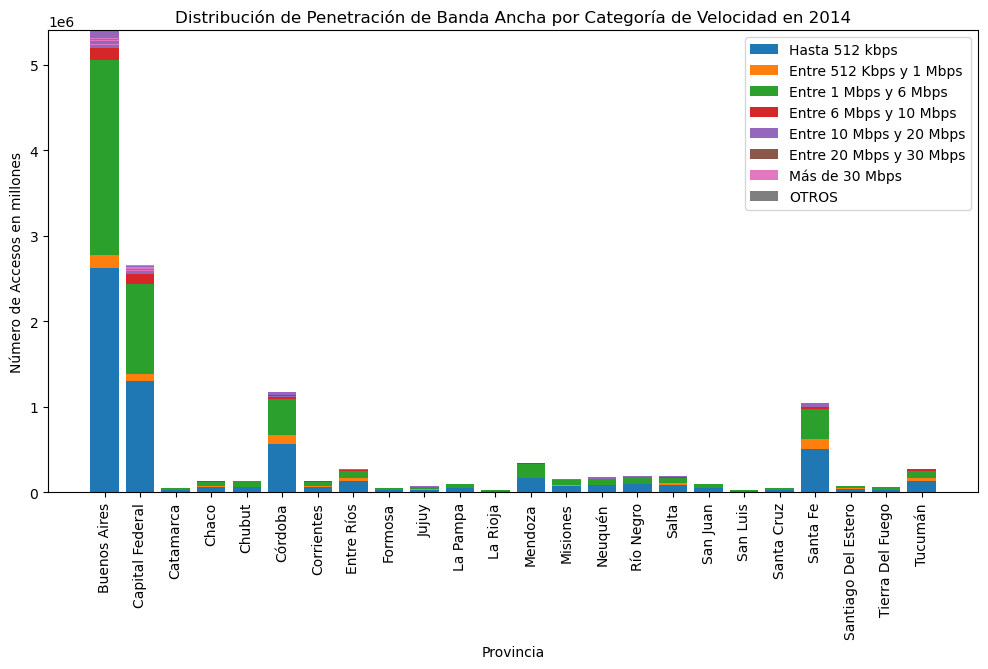

In [31]:
# Filtrar el DataFrame para un año específico (por ejemplo, 2022)
año_elegido = 2014
data_año_elegido = prov_dis_accesos_rango_vel_bajada[prov_dis_accesos_rango_vel_bajada['Año'] == año_elegido]

# Definir las categorías de velocidad
categorias = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
              'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS']

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 6))
bottom = None
for categoria in categorias:
    plt.bar(data_año_elegido['Provincia'], data_año_elegido[categoria], label=categoria, bottom=bottom)
    if bottom is None:
        bottom = data_año_elegido[categoria]
    else:
        bottom += data_año_elegido[categoria]

plt.xlabel('Provincia')
plt.ylabel('Número de Accesos en millones')
plt.title(f'Distribución de Penetración de Banda Ancha por Categoría de Velocidad en {año_elegido}')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

Vemos un gran cambio en el acceso a grandes velocidades de internet entre los años 2014 y 2022, lo que corresponderia al avance tecnologico y la facilitación del acceso a estas velocidades al nivel de los hogares

In [8]:
na_dis_accesos_rango_vel_bajada.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


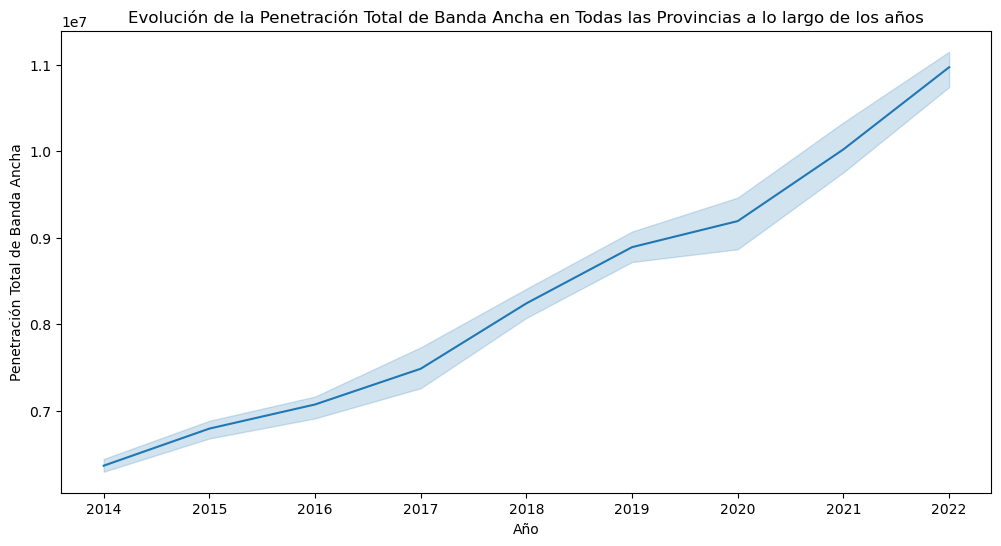

In [10]:
# Crear el gráfico de líneas para la evolución de la penetración total de banda ancha a lo largo de los años
plt.figure(figsize=(12, 6))
sns.lineplot(data=na_dis_accesos_rango_vel_bajada, x='Año', y='Total')
plt.xlabel('Año')
plt.ylabel('Penetración Total de Banda Ancha')
plt.title('Evolución de la Penetración Total de Banda Ancha en Todas las Provincias a lo largo de los años')
plt.show()

In [35]:
na_dis_accesos_rango_vel_bajada.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,49571.638889,239046.083333,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,126059.500000,8.337742e+06
std,2.618615,1.133893,52406.958667,198205.544715,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,120429.285661,1.504414e+06
min,2014.000000,1.000000,5675.000000,28521.000000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,28412.500000,74491.750000,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06
50%,2018.000000,2.500000,38879.500000,216701.500000,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155810.000000,8.228740e+06
75%,2020.000000,3.250000,41184.000000,389368.250000,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199011.250000,9.410040e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394282.000000,1.120811e+07


Tendencia de Crecimiento:
 A lo largo de los años, se observa un crecimiento en la cantidad de accesos de banda ancha en todos los rangos de velocidad. El promedio del total de accesos en el último trimestre de 2022 es significativamente mayor que en trimestres anteriores.

Variabilidad en la Adopción: 
Existe una variabilidad significativa en la adopción de servicios de banda ancha en diferentes rangos de velocidad. Esto se refleja en las desviaciones estándar, que son particularmente altas para los rangos Entre 1 Mbps - 6 Mbps y Más de 30 Mbps.

In [37]:
na_ingresos_operadores_fijo.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,36.000000,36.000000,3.600000e+01
mean,2018.000000,2.500000,2.193842e+07
std,2.618615,1.133893,1.930189e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.750000,6.384892e+06
50%,2018.000000,2.500000,1.486522e+07
75%,2020.000000,3.250000,3.246178e+07
max,2022.000000,4.000000,7.244348e+07


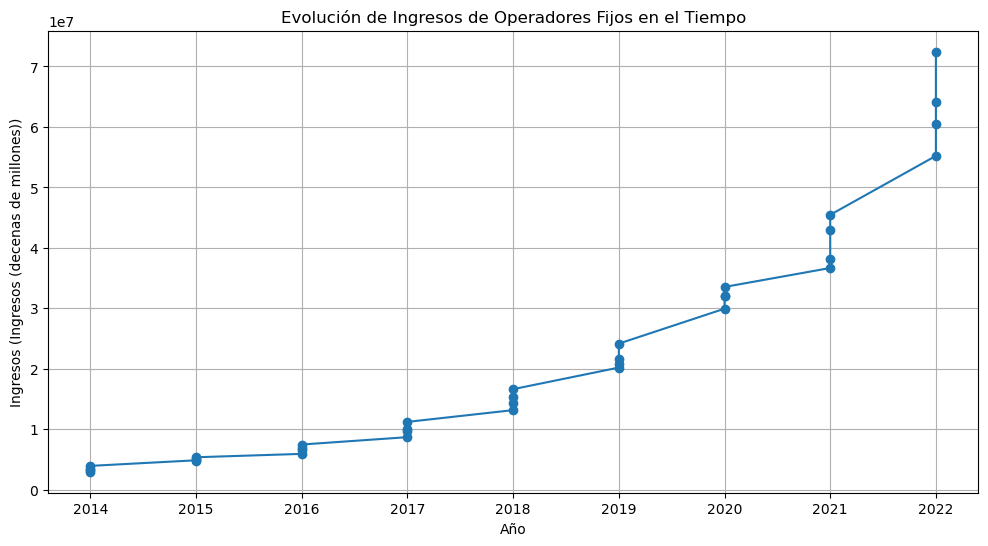

In [43]:
# Crear un gráfico de línea para la evolución de los ingresos de operadores fijos
plt.figure(figsize=(12, 6))
plt.plot(na_ingresos_operadores_fijo['Año'], na_ingresos_operadores_fijo['Ingresos (miles de pesos)'], marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Ingresos (Ingresos (decenas de millones))')
plt.title('Evolución de Ingresos de Operadores Fijos en el Tiempo')
plt.grid(True)
plt.show()

El "Ingreso" se mide en miles de pesos (ARS).

El ingreso promedio en el período de estudio es de aproximadamente ARS 21,938,420.

La desviación estándar es de alrededor de ARS 19,301,890, lo que indica una variabilidad significativa en los ingresos a lo largo de los años y trimestres.

### ***Visualización del KPI Solicitado***

En el contexto de este estudio, se utiliza un KPI (Indicador Clave de Rendimiento) específico para evaluar el acceso a Internet en cada provincia. El KPI propuesto tiene como objetivo medir y monitorear el aumento en el acceso al servicio de Internet para el próximo trimestre, tomando como referencia cada 100 hogares en una provincia.

Fórmula del KPI

KPI = (("Nuevo acceso" - "Acceso actual") / "Acceso actual") * 100

In [101]:
# Filtra los datos por trimestre 3 y 4 del año 2022
trimestre_3 = prov_accesos_cada_100_hogares_fijo[(prov_accesos_cada_100_hogares_fijo['Año'] == 2022) & (prov_accesos_cada_100_hogares_fijo['Trimestre'] == 3)]
trimestre_4 = prov_accesos_cada_100_hogares_fijo[(prov_accesos_cada_100_hogares_fijo['Año'] == 2022) & (prov_accesos_cada_100_hogares_fijo['Trimestre'] == 4)]

# Realiza el cálculo del KPI
kpi_provincias = (trimestre_4.set_index('Provincia')['Accesos por cada 100 hogares'] - trimestre_3.set_index('Provincia')['Accesos por cada 100 hogares']) / trimestre_3.set_index('Provincia')['Accesos por cada 100 hogares'] * 100

# Crea un DataFrame con los resultados
kpi_df = pd.DataFrame({
    'Provincia': kpi_provincias.index,
    'Trimestre Anterior': trimestre_3.set_index('Provincia')['Accesos por cada 100 hogares'].values,
    'Trimestre Nuevo': trimestre_4.set_index('Provincia')['Accesos por cada 100 hogares'].values,
    'Resultado': kpi_provincias.values
})

kpi_df = kpi_df.sort_values(by='Resultado', ascending=False)
# Restablece el índice
kpi_df = kpi_df.reset_index(drop=True)


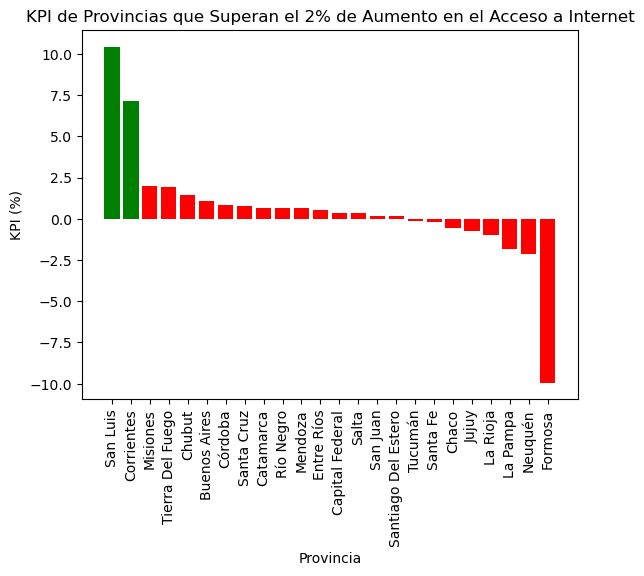

In [102]:

# Calcula el límite del 2% para diferenciar las barras en verde y rojo
limite = 2
# Usamos list comprehension para determinar el color de cada barra
colores = ['green' if kpi > limite else 'red' for kpi in kpi_df['Resultado']]
# Genera el gráfico de barras con colores personalizados
plt.bar(kpi_df['Provincia'], kpi_df['Resultado'], color=colores)

plt.xlabel('Provincia')
plt.ylabel('KPI (%)')
plt.title('KPI de Provincias que Superan el 2% de Aumento en el Acceso a Internet')
plt.xticks(rotation=90)
plt.show()

De los 24 territorios analizados, solamente dos provincias cumplieron con el KPI de aumentar en un 2% el acceso al servicio de Internet: San Luis y Corrientes. Esta es una conclusión crítica que demuestra que la gran mayoría de las provincias no lograron el objetivo establecido.

La conclusión principal, por lo tanto, es que solo dos provincias superaron el KPI, lo que destaca la necesidad de abordar los desafíos en términos de acceso a Internet en la mayoría de las regiones de Argentina

In [103]:
kpi_df.head(24)

,Provincia,Trimestre Anterior,Trimestre Nuevo,Resultado
0,San Luis,81.74,90.27,10.435527
1,Corrientes,48.21,51.64,7.114706
2,Misiones,51.82,52.85,1.987650
3,Tierra Del Fuego,99.51,101.44,1.939504
4,Chubut,84.38,85.57,1.410287
5,Buenos Aires,78.11,78.94,1.062604
6,Córdoba,88.31,89.03,0.815310
7,Santa Cruz,43.19,43.53,0.787219
8,Catamarca,65.33,65.77,0.673504
9,Río Negro,67.98,68.42,0.647249


Provincias con Mayor Crecimiento: San Luis tuvo el mayor aumento en el acceso a Internet, con un 10.44%. Corrientes, Misiones y Tierra del Fuego también mostraron un crecimiento significativo, todos superando el 1.9%.

Variabilidad en el Crecimiento: Las provincias presentan una amplia variabilidad en términos de crecimiento. Algunas experimentaron un crecimiento positivo, mientras que otras tuvieron un crecimiento moderado o incluso una disminución en el acceso a Internet.

Algunas Provincias Cerca del 2%: Varias provincias, como Chubut, Buenos Aires y Córdoba, se acercaron al 2% de aumento, lo que indica un crecimiento constante en el acceso a Internet.

Influencia de Buenos Aires: Buenos Aires, siendo la provincia más poblada de Argentina, puede tener un impacto significativo en el KPI nacional. El hecho de que haya experimentado un crecimiento positivo es un buen indicio para el país.

Diferencias Regionales: Es importante destacar las diferencias regionales en el crecimiento. Provincias del sur, como Tierra del Fuego y Chubut, tuvieron aumentos notables, mientras que algunas provincias del norte, como Formosa y Jujuy, tuvieron disminuciones.

Retos en el Acceso a Internet: Provincias como Formosa experimentaron una disminución significativa en el acceso a Internet. Esto podría indicar desafíos en la infraestructura de telecomunicaciones o en la adopción de tecnología en esa región.

### ***Visualización del KPI propuesto***

Nombre del KPI: "KPI de Mejora de Velocidad de Internet Fijo"

Fórmula del KPI:
KPI = ((Velocidad Media de Bajada Actual - Velocidad Media de Bajada Anterior) / Velocidad Media de Bajada Anterior) * 100

Descripción del KPI:
Este KPI mide la mejora o disminución en la velocidad media de bajada de la conexión a Internet fijo entre dos periodos, generalmente trimestres consecutivos. Se expresa como un porcentaje y permite evaluar el progreso en la calidad de servicio de Internet fijo en una región específica. El objetivo es alcanzar un aumento del 10% en la velocidad de bajada con respecto al periodo anterior.

In [112]:
# Filtra los datos por trimestre 3 y 4 del año 2022
trimestre_3 = prov_velocidad_media_bajada[(prov_velocidad_media_bajada['Año'] == 2022) & (prov_velocidad_media_bajada['Trimestre'] == 3)]
trimestre_4 = prov_velocidad_media_bajada[(prov_velocidad_media_bajada['Año'] == 2022) & (prov_velocidad_media_bajada['Trimestre'] == 4)]

# Realiza el cálculo del KPI
kpi_provincias = (trimestre_4.set_index('Provincia')['Mbps (Media de bajada)'] - trimestre_3.set_index('Provincia')['Mbps (Media de bajada)']) / trimestre_3.set_index('Provincia')['Mbps (Media de bajada)'] * 100

# Crea un DataFrame con los resultados
kpi_df = pd.DataFrame({
    'Provincia': kpi_provincias.index,
    'Trimestre Anterior': trimestre_3.set_index('Provincia')['Mbps (Media de bajada)'].values,
    'Trimestre Nuevo': trimestre_4.set_index('Provincia')['Mbps (Media de bajada)'].values,
    'Resultado': kpi_provincias.values
})

kpi_df = kpi_df.sort_values(by='Resultado', ascending=False)
# Restablece el índice
kpi_df = kpi_df.reset_index(drop=True)



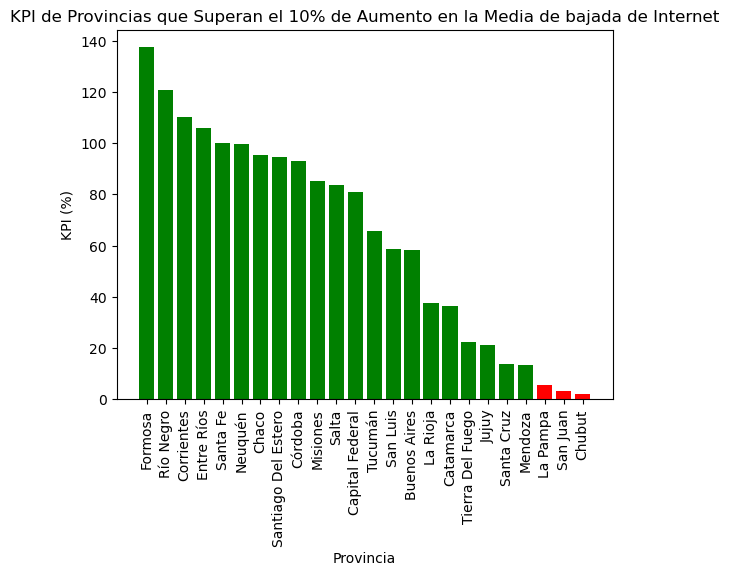

In [116]:

# Calcula el límite del 2% para diferenciar las barras en verde y rojo
limite = 10
# Usamos list comprehension para determinar el color de cada barra
colores = ['green' if kpi > limite else 'red' for kpi in kpi_df['Resultado']]
# Genera el gráfico de barras con colores personalizados
plt.bar(kpi_df['Provincia'], kpi_df['Resultado'], color=colores)

plt.xlabel('Provincia')
plt.ylabel('KPI (%)')
plt.title('KPI de Provincias que Superan el 10% de Aumento en la Media de bajada de Internet')
plt.xticks(rotation=90)
plt.show()

In [111]:
# Imprimir el DataFrame con los resultados
kpi_df.head(24)

,Provincia,Trimestre Anterior,Trimestre Nuevo,Resultado
0,Formosa,30.35,72.03,137.331137
1,Río Negro,34.13,75.31,120.656314
2,Corrientes,45.07,94.72,110.161970
3,Entre Ríos,42.49,87.47,105.860202
4,Santa Fe,45.15,90.30,100.000000
5,Neuquén,47.81,95.37,99.477097
6,Chaco,53.21,104.02,95.489570
7,Santiago Del Estero,17.69,34.40,94.460147
8,Córdoba,56.32,108.77,93.128551
9,Misiones,49.30,91.24,85.070994


Aumento en todas las provincias: Todos los valores del KPI son positivos, lo que indica que en todas las provincias se ha experimentado un aumento en la velocidad de bajada en promedio entre el trimestre anterior y el trimestre nuevo. Esto es una señal positiva, ya que generalmente un aumento en la velocidad de Internet es beneficioso para los usuarios y puede estar relacionado con mejoras en la infraestructura y en los servicios de Internet fijo.

Diferencias notables entre provincias: Los resultados demuestran una amplia variabilidad en la mejora de la velocidad de bajada entre las provincias. Algunas provincias han experimentado aumentos significativos, mientras que otras muestran un progreso más moderado.

Provincias con notables aumentos: Formosa, Río Negro y Corrientes lideran el aumento en la velocidad de bajada, con incrementos del 137.33%, 120.66% y 110.16% respectivamente. Esto indica mejoras significativas en la calidad de la conexión a Internet en estas regiones.

Mejoras en provincias más grandes: Provincias con una mayor población, como Santa Fe, Córdoba y Buenos Aires, han logrado aumentos significativos en la velocidad de bajada, del 100%, 93.13% y 58.14% respectivamente. Esto es especialmente relevante, ya que estas provincias suelen tener una alta demanda de servicios de Internet.

Variabilidad en provincias más pequeñas: En provincias con poblaciones más pequeñas, como Tierra del Fuego, La Pampa y San Juan, las mejoras son menos notables. Esto puede deberse a limitaciones en la inversión en infraestructura en regiones menos pobladas.

Retos en provincias con menos mejoras: Algunas provincias, como Tucumán, La Rioja y Catamarca, han experimentado mejoras más modestas en la velocidad de bajada, lo que sugiere posibles retos en la expansión de servicios de Internet de alta velocidad en esas regiones.